Project name :   Advertising

project Description:
        Here, we have of one company's marketing stretagy, in which they spent some amount for marketing in various section like TV ads, Newspaper blog, Radio ads and according to they have data of changes in sales.

project Goal: 
        Our goal is to findout which section affects sales increase parameter so company can mark budget for that section effectively.

import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, LassoCV,Ridge,RidgeCV

Load the dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Check basic parameter to understand data.
shape, describe, data types, null values

In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
print("       Info Of the Data Set")
print("-------------------------------------")
df.info()

#there is no null values in our dataset

       Info Of the Data Set
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
print        ("null value status")
print("-------------------------------------")
df.isnull().sum()

null value status
-------------------------------------


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Cheking for skewness in dataset

In [10]:
df.skew()
df.kurt()

#Here, we can see that only 'newspaper' have high skewness. so we will work on it later

TV          -1.226495
radio       -1.260401
newspaper    0.649502
sales       -0.408869
dtype: float64

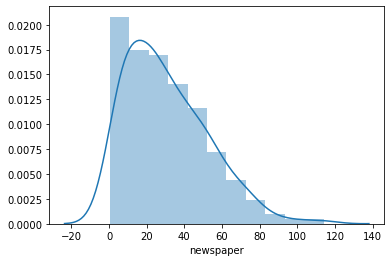

In [11]:
sns_plot = sns.distplot(df["newspaper"])
#right skewed


<Figure size 144x72 with 0 Axes>

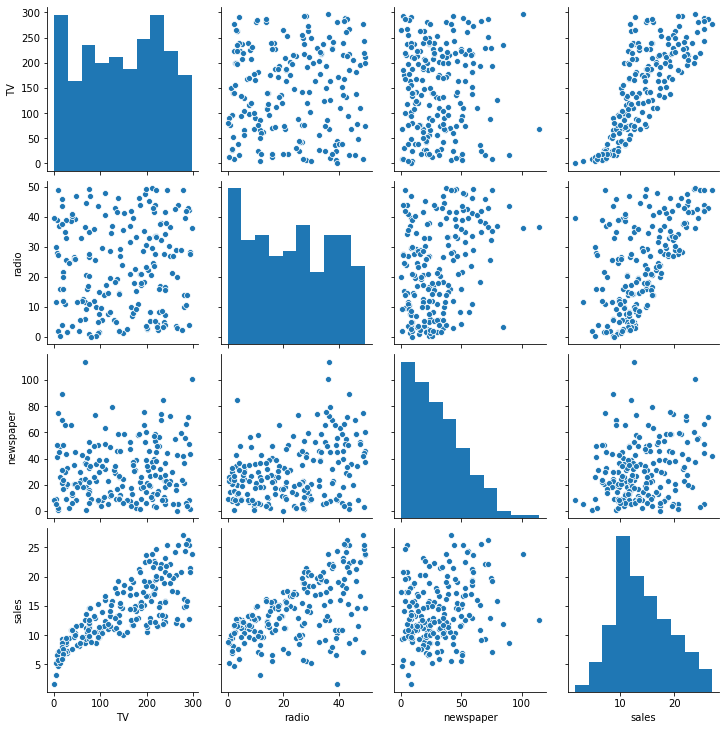

In [12]:
plt.figure(figsize=(2,1))
sns.pairplot(df)

#TV have good corelation with sales while radio have avg but newspaper have no control over sales and we can also see that there is no any internal corelation also 

From the above graph, we can mark that 

1)as advertising on TV increase, there is a increase in sales

2)as advertising on RADIO increase, there is a increase in sales but not as much as TV

3)advertising in NEWSPAPER is not look as much as important comparitively others two becuase there is no much control of sales on newspaper

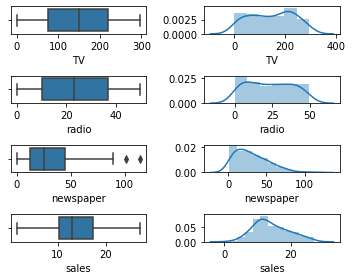

In [13]:
fig, ax = plt.subplots(4, 2, figsize = (5, 4))
sns.boxplot(x= df["TV"], ax = ax[0,0])
sns.distplot(df['TV'], ax = ax[0,1])
sns.boxplot(x= df["radio"], ax = ax[1,0])
sns.distplot(df['radio'], ax = ax[1,1])
sns.boxplot(x= df["newspaper"], ax = ax[2,0])
sns.distplot(df['newspaper'], ax = ax[2,1])
sns.boxplot(x= df["sales"], ax = ax[3,0])
sns.distplot(df['sales'], ax = ax[3,1])
plt.tight_layout()

From above graph, we can get better view about data plotting that RADIO and TV column have normally distributed data while from the box plot we can see that NEWSPAPER column have positive skewness

<Figure size 432x288 with 0 Axes>

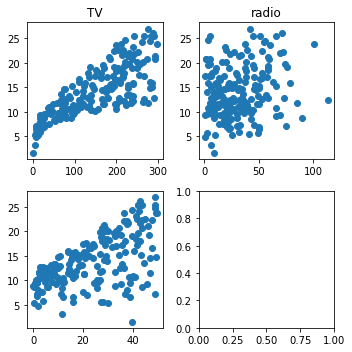

In [14]:
plt.figure(1)

f,axarr = plt.subplots(2,2, figsize=(5,5))
sale = df.sales.values
axarr[0,0].scatter(df.TV.values, sale)
axarr[0,0].set_title('TV')
axarr[0,1].scatter(df.newspaper.values,sale)
axarr[0,1].set_title('newspaper')
axarr[1,0].scatter(df.radio.values, sale)
axarr[0,1].set_title('radio')
plt.tight_layout()
plt.show()

#cheking for corelation between labels and features

Scattering plot shows us data distribution, which helps us to watch outliers and corelation with each other

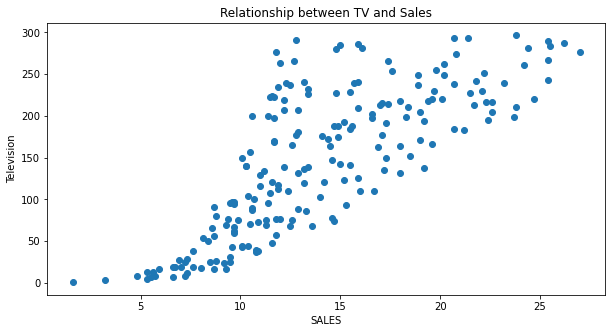

In [15]:
x = df.sales
y = df.TV
plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.title('Relationship between TV and Sales')

plt.xlabel('SALES')
plt.ylabel('Television')
plt.show()

#increase in budget for TV marketing leads to increase in sales 

Sales vs Television have data plotted normally but some data points are plotted far away from regression line

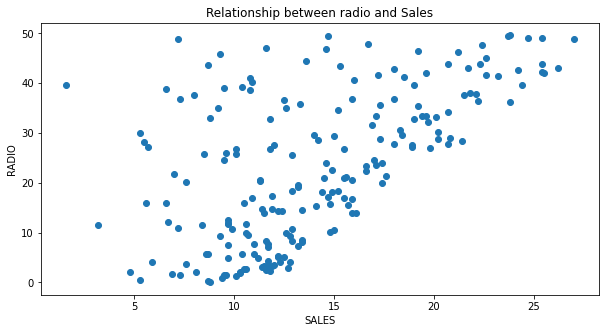

In [16]:
x = df.sales
y = df.radio
plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.title('Relationship between radio and Sales')

plt.xlabel('SALES')
plt.ylabel('RADIO')
plt.show()

#increase in radio marketing leads to increase in sales but here we can mark some points are high in radio budget but there sales is still low.

#SALES vs TELEVISION have data where some datapoints are plotted far from regression line

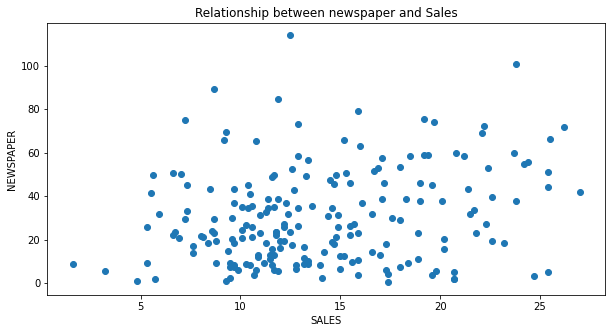

In [17]:
x = df.sales
y = df.newspaper
plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.title('Relationship between newspaper and Sales')

plt.xlabel('SALES')
plt.ylabel('NEWSPAPER')
plt.show()

#newpaper marketing have no relationship with sales

Data is not normally distributed, which can leads to less effectiveness on Target variable

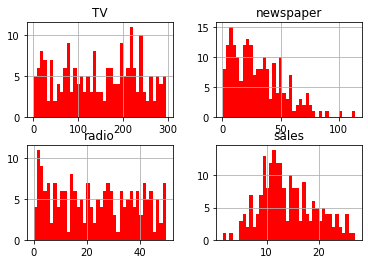

In [18]:
df.hist(figsize=(6,4),bins=40, color='red')
plt.show()

#heatmap can show us how data points are plotted, how is variation in datapoint and in which range most of data plotted

<Figure size 576x576 with 0 Axes>

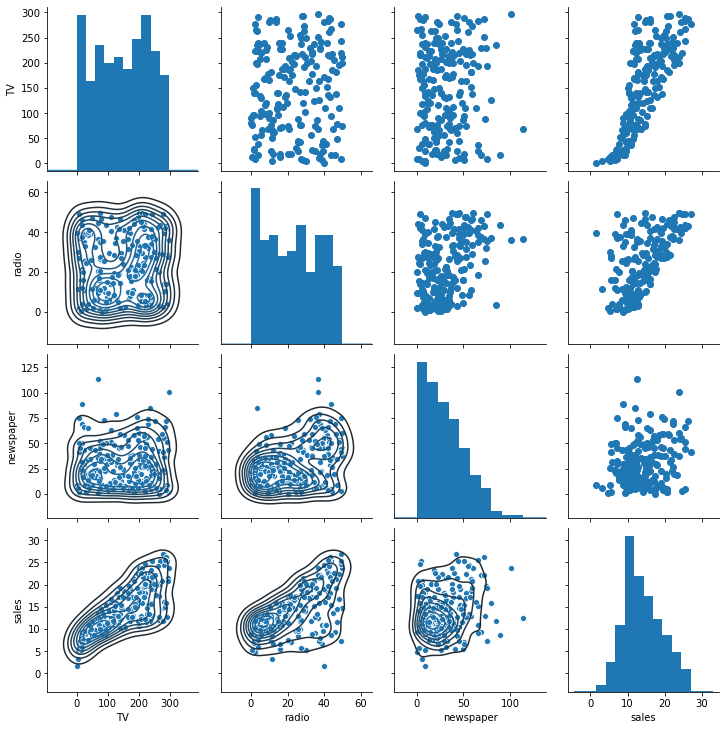

In [19]:
fig1 = plt.figure(figsize=(8,8))
fig1 = sns.pairplot(data=df)
fig1.map_upper(plt.scatter)
fig1.map_diag(sns.distplot)
fig1.map_lower(sns.kdeplot)

#best graph for this proeject according to me because here we can visulise about

1)TV ads have high corelation with sales
2)Radio ads have also good coleration with sales
3)Newspaper have no much relation with sales
4)there are outliers are available in newspaper column
5)Newspaper column have skewed data

From above graph, he visually found some outliers are there in Newspaper columns

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


from above code we can note that TV column have high corelation with Sales column
newspaper column have low corelation with sales column

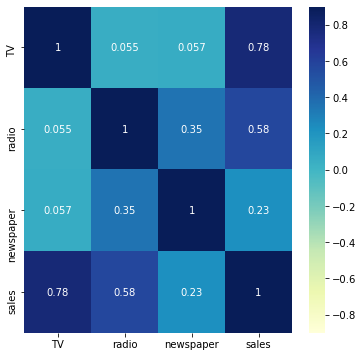

In [21]:
fig2 = plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',vmax=0.9,vmin=-0.9)

Heatplot is useful to visulize corelation two column

In [22]:
    from scipy.stats import zscore

    #di=df.columns
    z_score=zscore(df)
    print(df.shape)
    df_1=df.loc[(z_score<3).all(axis=1)]
    print(df_1.shape)

(200, 4)
(198, 4)


using Zscore technique, we will remove outliers and for above dataset we found 2 outliers and we removed it

In [23]:
df_1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [24]:
from scipy.stats import boxcox
for col in df:
    if df_1[col].skew()>=.30:
        df_1[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
    if df_1[col].skew()<=-.30:
        df_1[col]=np.power(df_1[col],2)

<ipython-input-24-0fc23db8438c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
<ipython-input-24-0fc23db8438c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col]=np.power(df_1[col],2)


Here we remove skewness using power transformation and CRT, squart root

In [25]:
df_1.skew()

TV          -0.082332
radio        0.114842
newspaper    0.214716
sales        0.090777
dtype: float64

now we can see there is very low skewness. we can conclude it and proceed forward

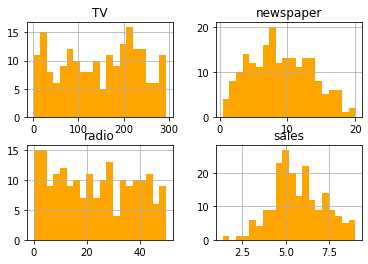

In [26]:
df_1.hist(figsize=(6,4),bins=20, color='orange')
plt.show()

From above his plot, now we can visulize all data columns are normally distributed

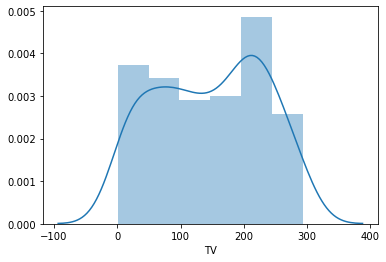

In [27]:
sns.distplot(df_1['TV'])

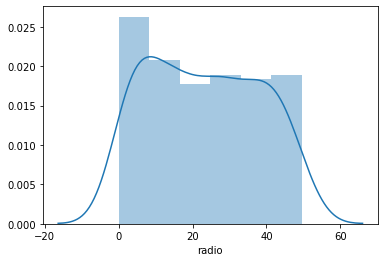

In [28]:
sns.distplot(df_1['radio'])


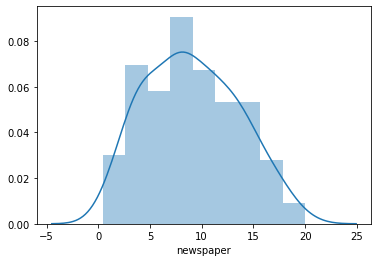

In [29]:
sns.distplot(df_1['newspaper'])


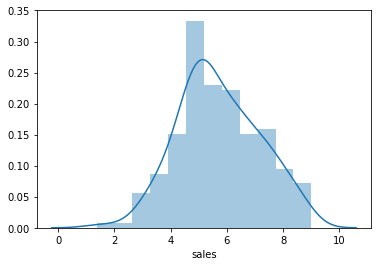

In [30]:
sns.distplot(df_1['sales'])

In [31]:
cols = ['TV','newspaper','radio']

Q1 = df_1[cols].quantile(0.25)
Q3 = df_1[cols].quantile(0.75)
IQR = Q3 - Q1

df1 = df_1[~((df_1[cols] < (Q1 - 1.5 * IQR)) |(df_1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df1.shape)

(198, 4)


as we remove outliers using z score but here i again check for outliers using Qurtiles method

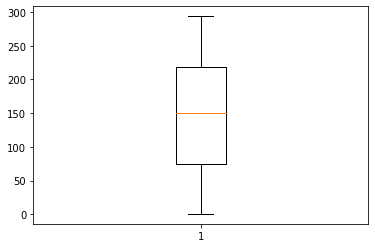

In [32]:
plt.boxplot(df1["TV"])
plt.show()

TV column have no any outliers, is normally distributed

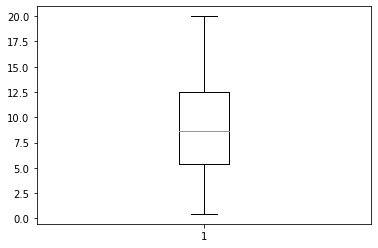

In [33]:
plt.boxplot(df1["newspaper"])
plt.show()

Newspaper column have not any outliers now and is normally distributed

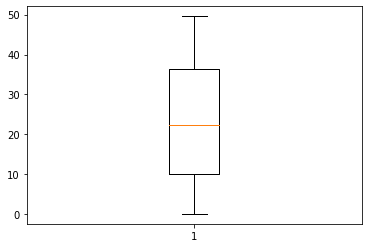

In [34]:
plt.boxplot(df1["radio"])
plt.show()

Radio column have no outliers and is normally distributed

CONCLUSION OF EDA

1) From all 3 column, "TV" column have high co-relation with sales

2) As company increase weitage on TV and Radio Advertising leads to increase in sales

3) Newspaper have very less effectiveness on sales variable

4) We are not drop NEWSPAPER column because we must need to conclude it for sales data, here, we can not ignor it's low corealation with sales variable.

5) All columns are normally distributed

6) All columns have Float64 dtypes.

7) As data have no null, normally distributed, no skewness so we can proceed it for Machinelearning

In [35]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
feature_cols = ['TV', 'radio', 'newspaper']
x= df[feature_cols]
y = df.sales

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# to scale all data on same format

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.25,random_state = 50) 

LINEAR REGRESSION

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm = LinearRegression()

In [57]:
lm.fit(x_train,y_train)
Y_pred = lm.predict(x_test)
Y_pred= Y_pred.reshape(-1,1)
acc_reg = round(lm.score(x_train, y_train) * 100, 2)
acc_reg

89.86

In [58]:
print(lm)
print(lm.intercept_)
print(lm.coef_)

LinearRegression()
14.018623715477306
[4.03164606 2.73825619 0.08037503]


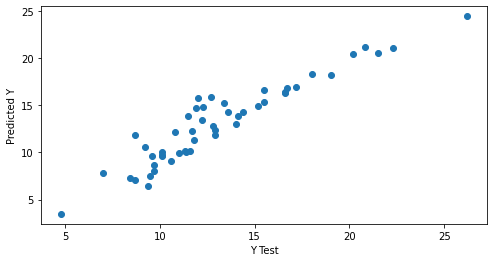

In [59]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,Y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [60]:
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score


In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print ('r2_score:', r2_score(y_test,Y_pred))


MAE: 1.1249454594389112
MSE: 2.1201664625608108
RMSE: 1.4560791402121007
r2_score: 0.8789006652994477


GRADIENTBOOSTING REGRESSOR

In [62]:
params = {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)

reg.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=6)

In [63]:
reg_pred=reg.predict(x_test)
reg_pred= reg_pred.reshape(-1,1)


In [64]:
acc_gbr = round(reg.score(x_train, y_train) * 100, 2)
acc_gbr

99.99

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, reg_pred))
print('MSE:', metrics.mean_squared_error(y_test, reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, reg_pred)))

MAE: 0.4970957483745198
MSE: 0.3746321005570747
RMSE: 0.6120719733471504


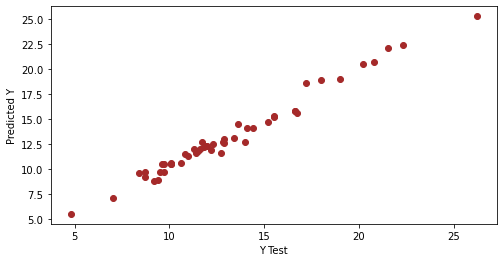

In [66]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,reg_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

DECISIONTREE

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=100)

In [68]:
dtr_pred = dtreg.predict(x_test)
dtr_pred= dtr_pred.reshape(-1,1)
acc_dtr = round(dtreg.score(x_train, y_train) * 100, 2)
acc_dtr

100.0

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.6999999999999998
MSE: 0.7500000000000001
RMSE: 0.8660254037844387


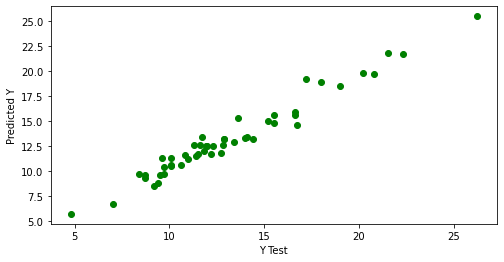

In [70]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


SUPPORT VECTOR REGRESSOR

In [73]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

SVR()

In [74]:
svr_pred = svr.predict(x_test)
svr_pred= svr_pred.reshape(-1,1)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.6634092009460503
MSE: 1.2852703052777497
RMSE: 1.133697625153087


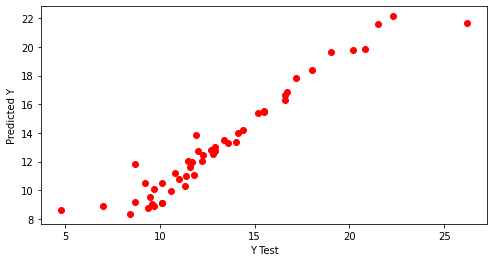

In [76]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

RANDOMFOREST REGRESSOR

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [78]:
rfr_pred= rfr.predict(x_test)
rfr_pred = rfr_pred.reshape(-1,1)
acc_rfr = round(rfr.score(x_train, y_train) * 100, 2)
acc_rfr

99.67

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.43812000000000006
MSE: 0.3205658000000004
RMSE: 0.5661853053550581


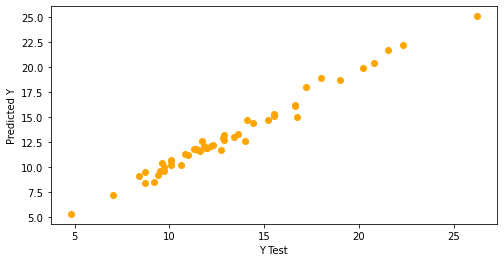

In [80]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

LGBM REGRESSOR

In [81]:
!pip install lightgbm
import lightgbm as lgb

In [82]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [83]:
model_lgb.fit(x_train,y_train)
lgb_pred = model_lgb.predict(x_test)
lgb_pred = lgb_pred.reshape(-1,1)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [84]:
Y_pred = model_lgb.predict(x_test)
acc_lgb = round(model_lgb.score(x_train, y_train) * 100, 2)
acc_lgb

97.01

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 1.1408376164499034
MSE: 2.184672581658831
RMSE: 1.4780637948542108


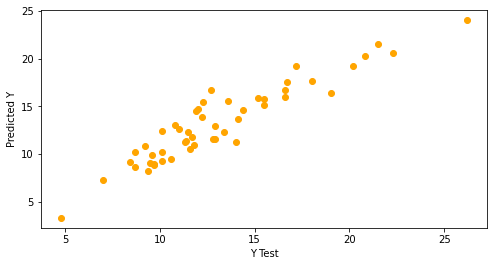

In [86]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [89]:
error_rate=np.array([metrics.mean_squared_error(y_test,Y_pred),metrics.mean_squared_error(y_test, reg_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

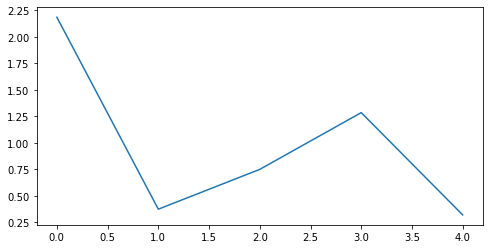

In [90]:
plt.figure(figsize=(8,4))
plt.plot(error_rate)

DUMP THE MODEL

In [103]:
import pickle
output=open("ads.pickle","wb")pred=model3.predict(new_data)
pickle.dump(rfr,output)

In [104]:
sales_pred=open("ads.pickle","rb")

In [105]:
emp=pickle.load(sales_pred)